<a href="https://colab.research.google.com/github/tawiahnyt/phishing-detection/blob/main/phishing_url_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Libraries

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Data Collection and Analysis

In [65]:
# loading the dataset
phishing_data = pd.read_csv('Dataset.csv')

In [66]:
phishing_data.head()

,Type,url_length,number_of_dots_in_url,having_repeated_digits_in_url,number_of_digits_in_url,number_of_special_char_in_url,number_of_hyphens_in_url,number_of_underline_in_url,number_of_slash_in_url,number_of_questionmark_in_url,...,having_digits_in_subdomain,number_of_digits_in_subdomain,having_repeated_digits_in_subdomain,having_path,path_length,having_query,having_fragment,having_anchor,entropy_of_url,entropy_of_domain
0,0,37,2,0,0,8,0,0,5,0,...,0,0,1,0,3,0,0,0,4.010412,2.751629
1,1,70,5,0,0,12,0,0,6,0,...,0,0,1,0,4,0,0,0,4.089470,3.532573
2,0,42,2,0,6,8,0,0,3,1,...,0,0,1,0,1,1,0,0,4.386016,3.344698
3,0,46,2,0,0,7,0,0,4,0,...,0,0,1,0,2,0,0,0,4.221947,3.189898
4,0,51,3,0,0,9,0,0,5,0,...,0,0,1,0,3,0,0,0,4.103538,2.952820


In [67]:
phishing_data.shape

(247950, 42)

In [68]:
phishing_data.describe()

,Type,url_length,number_of_dots_in_url,having_repeated_digits_in_url,number_of_digits_in_url,number_of_special_char_in_url,number_of_hyphens_in_url,number_of_underline_in_url,number_of_slash_in_url,number_of_questionmark_in_url,...,having_digits_in_subdomain,number_of_digits_in_subdomain,having_repeated_digits_in_subdomain,having_path,path_length,having_query,having_fragment,having_anchor,entropy_of_url,entropy_of_domain
count,247950.000000,247950.000000,247950.000000,247950.000000,247950.000000,247950.000000,247950.000000,247950.000000,247950.000000,247950.000000,...,247950.000000,247950.000000,247950.0,247950.0,247950.000000,247950.000000,247950.000000,247950.000000,247950.000000,247950.000000
mean,0.481585,58.358197,2.894075,0.162351,4.366070,10.303218,0.600867,0.204049,4.784533,0.159911,...,0.064529,0.224013,1.0,0.0,2.606977,0.126501,0.002303,0.000944,4.257222,3.389839
std,0.499662,29.764620,1.690970,0.368773,9.579032,4.718381,1.235599,0.653502,1.812574,0.449506,...,0.245694,1.276447,0.0,0.0,1.636938,0.332414,0.047933,0.030706,0.328098,0.376361
min,0.000000,12.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000,0.000000,2.648939,1.386274
25%,0.000000,39.000000,2.000000,0.000000,0.000000,7.000000,0.000000,0.000000,4.000000,0.000000,...,0.000000,0.000000,1.0,0.0,2.000000,0.000000,0.000000,0.000000,4.038910,3.180833
50%,0.000000,49.000000,3.000000,0.000000,0.000000,9.000000,0.000000,0.000000,4.000000,0.000000,...,0.000000,0.000000,1.0,0.0,2.000000,0.000000,0.000000,0.000000,4.208298,3.392747
75%,1.000000,69.000000,3.000000,0.000000,4.000000,11.000000,1.000000,0.000000,5.000000,0.000000,...,0.000000,0.000000,1.0,0.0,3.000000,0.000000,0.000000,0.000000,4.428036,3.606937
max,1.000000,191.000000,28.000000,1.000000,144.000000,75.000000,23.000000,47.000000,30.000000,17.000000,...,1.000000,44.000000,1.0,0.0,28.000000,1.000000,1.000000,1.000000,5.866327,4.957323


In [69]:
phishing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247950 entries, 0 to 247949
Data columns (total 42 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Type                                       247950 non-null  int64  
 1   url_length                                 247950 non-null  int64  
 2   number_of_dots_in_url                      247950 non-null  int64  
 3   having_repeated_digits_in_url              247950 non-null  int64  
 4   number_of_digits_in_url                    247950 non-null  int64  
 5   number_of_special_char_in_url              247950 non-null  int64  
 6   number_of_hyphens_in_url                   247950 non-null  int64  
 7   number_of_underline_in_url                 247950 non-null  int64  
 8   number_of_slash_in_url                     247950 non-null  int64  
 9   number_of_questionmark_in_url              247950 non-null  int64  
 10  number_o

In [70]:
phishing_data.isnull().sum()

,0
Type,0
url_length,0
number_of_dots_in_url,0
having_repeated_digits_in_url,0
number_of_digits_in_url,0
number_of_special_char_in_url,0
number_of_hyphens_in_url,0
number_of_underline_in_url,0
number_of_slash_in_url,0
number_of_questionmark_in_url,0


In [71]:
phishing_data.dropna(inplace=True)

In [72]:
# (0=legitimate,1=phishing)
phishing_data.Type.value_counts()

,count
Type,
0,128541
1,119409


In [73]:
phishing_data.columns

Index(['Type', 'url_length', 'number_of_dots_in_url',
       'having_repeated_digits_in_url', 'number_of_digits_in_url',
       'number_of_special_char_in_url', 'number_of_hyphens_in_url',
       'number_of_underline_in_url', 'number_of_slash_in_url',
       'number_of_questionmark_in_url', 'number_of_equal_in_url',
       'number_of_at_in_url', 'number_of_dollar_in_url',
       'number_of_exclamation_in_url', 'number_of_hashtag_in_url',
       'number_of_percent_in_url', 'domain_length', 'number_of_dots_in_domain',
       'number_of_hyphens_in_domain', 'having_special_characters_in_domain',
       'number_of_special_characters_in_domain', 'having_digits_in_domain',
       'number_of_digits_in_domain', 'having_repeated_digits_in_domain',
       'number_of_subdomains', 'having_dot_in_subdomain',
       'having_hyphen_in_subdomain', 'average_subdomain_length',
       'average_number_of_dots_in_subdomain',
       'average_number_of_hyphens_in_subdomain',
       'having_special_characters_

In [74]:
# # phishing_data correlation
# corr = phishing_data.corr()
# plt.figure(figsize=(12, 8))
# sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
# plt.show()

#### Using RandomForestClassifier's feature_importances_ feature to select important features from the dataset.

In [75]:
# X = phishing_data.drop('Type', axis=1)  # Feature matrix
# y = phishing_data['Type']  # Target variable

# model = RandomForestClassifier()
# model.fit(X, y)

# # Get feature importances
# feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
# feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# print(feature_importances)


In [76]:
# # Select top features based on importance
# selected_features = [
#     'url_length', 'average_subdomain_length', 'entropy_of_url', 'entropy_of_domain',
#     'domain_length', 'number_of_subdomains', 'number_of_special_char_in_url', 'number_of_digits_in_url'
# ]

In [77]:
# # Get summary statistics of the dataset
# phishing_data[selected_features].describe()

In [78]:
# # Create histograms for the numeric variables
# phishing_data[selected_features].hist(figsize=(12, 10), bins=20)
# plt.suptitle("Histograms of Key Variables")
# plt.show()

In [79]:
# # Correlation matrix
# corr_matrix = phishing_data[selected_features].corr()

# # Display the correlation matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, linewidths=1, linecolor='black')
# plt.title("Correlation Matrix of Features")
# plt.show()


In [80]:
# !pip install ydata_profiling
# from ydata_profiling import ProfileReport

# ProfileReport(phishing_data[selected_features], title='Phishing URL Dataset Profiling Report', explorative=True)

#### Train Test Split

In [81]:
X = phishing_data.drop('Type', axis=1)
y = phishing_data['Type']

In [117]:
X.head()

,url_length,number_of_dots_in_url,having_repeated_digits_in_url,number_of_digits_in_url,number_of_special_char_in_url,number_of_hyphens_in_url,number_of_underline_in_url,number_of_slash_in_url,number_of_questionmark_in_url,number_of_equal_in_url,...,having_digits_in_subdomain,number_of_digits_in_subdomain,having_repeated_digits_in_subdomain,having_path,path_length,having_query,having_fragment,having_anchor,entropy_of_url,entropy_of_domain
0,37,2,0,0,8,0,0,5,0,0,...,0,0,1,0,3,0,0,0,4.010412,2.751629
1,70,5,0,0,12,0,0,6,0,0,...,0,0,1,0,4,0,0,0,4.089470,3.532573
2,42,2,0,6,8,0,0,3,1,1,...,0,0,1,0,1,1,0,0,4.386016,3.344698
3,46,2,0,0,7,0,0,4,0,0,...,0,0,1,0,2,0,0,0,4.221947,3.189898
4,51,3,0,0,9,0,0,5,0,0,...,0,0,1,0,3,0,0,0,4.103538,2.952820


In [82]:
# Split the data (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Training

#### Random Forest Classifier

In [83]:
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

In [84]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [85]:
# Accuracy score on the training data
y_train_prediction = rf_model.predict(X_train)
training_data_accuracy = accuracy_score(y_train_prediction, y_train)

In [86]:
'Accuracy Score of the training data:', training_data_accuracy


('Accuracy Score of the training data:', 0.99890098810244)

In [87]:
# Accuracy score on the test data
y_test_prediction = rf_model.predict(X_test)
test_data_accuracy = accuracy_score(y_test_prediction, y_test)

In [88]:
'Accuracy Score of the test data:', test_data_accuracy


('Accuracy Score of the test data:', 0.9670498084291188)

In [89]:
# Evaluate the model
print(classification_report(y_test, y_test_prediction))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     25668
           1       0.97      0.96      0.97     23922

    accuracy                           0.97     49590
   macro avg       0.97      0.97      0.97     49590
weighted avg       0.97      0.97      0.97     49590



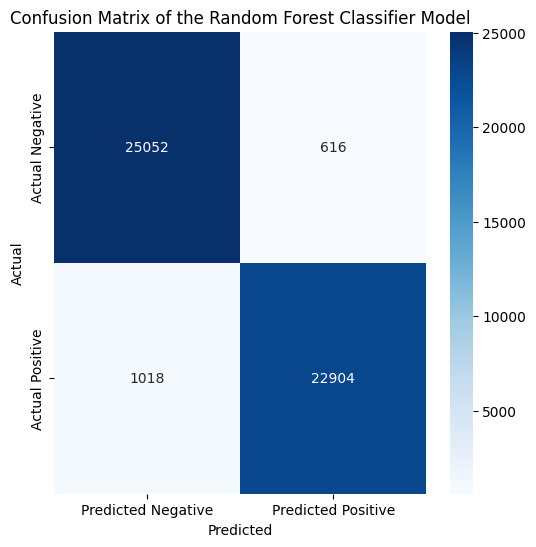

Confusion Matrix:
[[25052   616]
 [ 1018 22904]]


In [90]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of the Random Forest Classifier Model')
plt.show()

print("Confusion Matrix:")
print(cm)

### Logistic Regression

In [91]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [92]:
# Accuracy score on the test data
y_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(y_train_prediction, y_train)
print('Accuracy Score of the training data using logistic regression model:', training_data_accuracy)

Accuracy Score of the training data using logistic regression model: 0.8027172817100222


In [93]:
# Accuracy score on the test data
y_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(y_test_prediction, y_test)
print('Accuracy Score of the test data using logistic regression model:', test_data_accuracy)

Accuracy Score of the test data using logistic regression model: 0.800645291389393


In [94]:
# Evaluate the model
print(classification_report(y_test, y_test_prediction))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82     25668
           1       0.84      0.73      0.78     23922

    accuracy                           0.80     49590
   macro avg       0.81      0.80      0.80     49590
weighted avg       0.80      0.80      0.80     49590



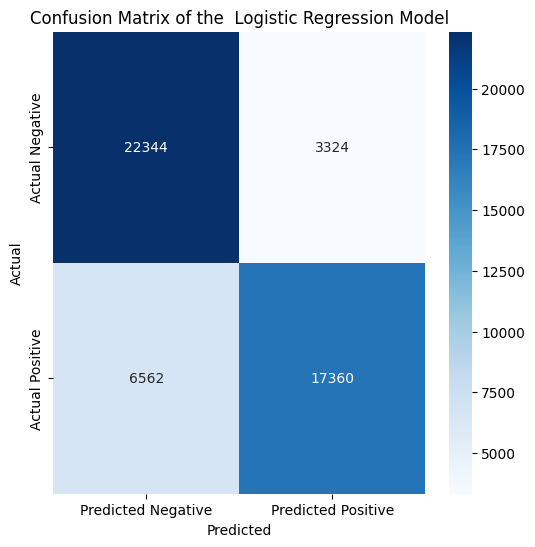

Confusion Matrix:
[[22344  3324]
 [ 6562 17360]]


In [95]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of the  Logistic Regression Model')
plt.show()

print("Confusion Matrix:")
print(cm)

### KNeighborsClassifier

In [96]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [97]:
# Accuracy score on the test data
y_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(y_train_prediction, y_train)
print('Accuracy Score of the training data using KNeighborsClassifier model:', training_data_accuracy)

Accuracy Score of the training data using KNeighborsClassifier model: 0.9682345230893326


In [98]:
# Accuracy score on the test data
y_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(y_test_prediction, y_test)
print('Accuracy Score of the test data using KNeighborsClassifier model:', test_data_accuracy)


Accuracy Score of the test data using KNeighborsClassifier model: 0.9176043557168784


In [99]:
# Evaluate the model
print(classification_report(y_test, y_test_prediction))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     25668
           1       0.92      0.91      0.91     23922

    accuracy                           0.92     49590
   macro avg       0.92      0.92      0.92     49590
weighted avg       0.92      0.92      0.92     49590



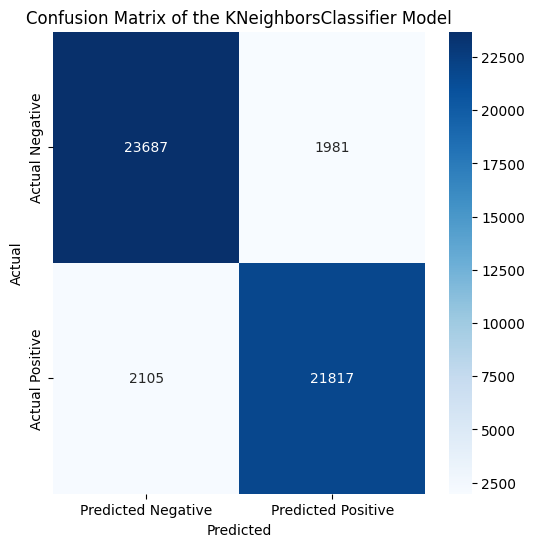

Confusion Matrix:
[[23687  1981]
 [ 2105 21817]]


In [100]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of the KNeighborsClassifier Model')
plt.show()

print("Confusion Matrix:")
print(cm)

### Decision Tree Classifier

In [101]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [102]:
# Accuracy score on the test data
y_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(y_train_prediction, y_train)
print('Accuracy Score of the training data using decision tree model:', training_data_accuracy)

Accuracy Score of the training data using decision tree model: 0.9989161121193789


In [103]:
# Accuracy score on the test data
y_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(y_test_prediction, y_test)
print('Accuracy Score of the test data using decision tree model:', test_data_accuracy)

Accuracy Score of the test data using decision tree model: 0.9528735632183908


In [104]:
# Evaluate the model
print(classification_report(y_test, y_test_prediction))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95     25668
           1       0.96      0.95      0.95     23922

    accuracy                           0.95     49590
   macro avg       0.95      0.95      0.95     49590
weighted avg       0.95      0.95      0.95     49590



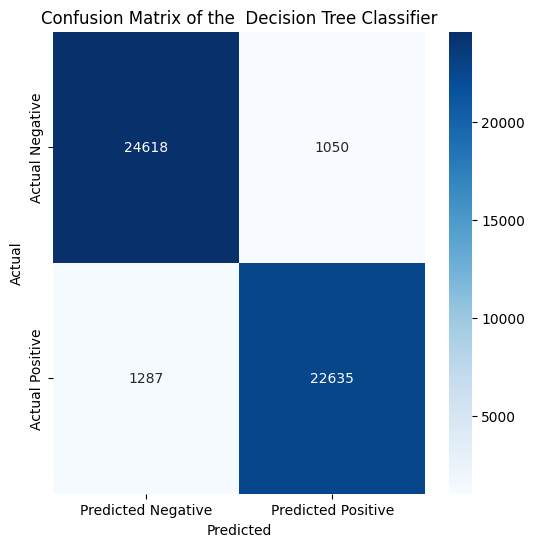

Confusion Matrix:
[[24618  1050]
 [ 1287 22635]]


In [105]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of the  Decision Tree Classifier')
plt.show()

print("Confusion Matrix:")
print(cm)

### Gradient Boosting Classifier

In [106]:
model = GradientBoostingClassifier(n_estimators=100)
model.fit(X_train, y_train)

GradientBoostingClassifier()

In [107]:
# Accuracy score on the test data
y_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(y_train_prediction, y_train)
print('Accuracy Score of the training data using GradientBoostingClassifier model:', training_data_accuracy)

Accuracy Score of the training data using GradientBoostingClassifier model: 0.8644686428715467


In [108]:
# Accuracy score on the test data
y_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(y_test_prediction, y_test)
print('Accuracy Score of the test data using GradientBoostingClassifier model:', test_data_accuracy)

Accuracy Score of the test data using GradientBoostingClassifier model: 0.8632587215164348


In [109]:
# Evaluate the model
print(classification_report(y_test, y_test_prediction))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87     25668
           1       0.88      0.82      0.85     23922

    accuracy                           0.86     49590
   macro avg       0.87      0.86      0.86     49590
weighted avg       0.86      0.86      0.86     49590



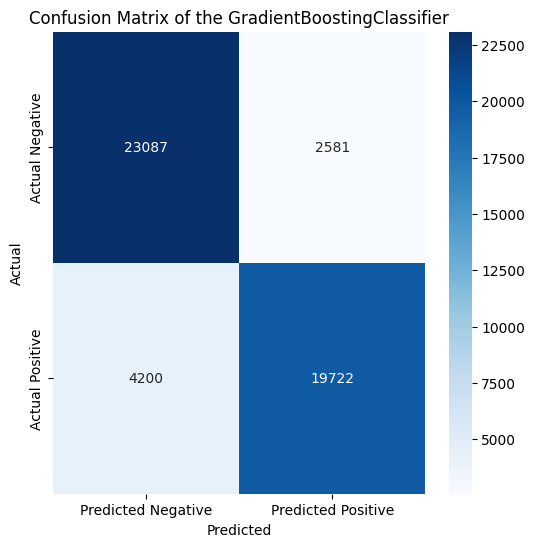

Confusion Matrix:
[[23087  2581]
 [ 4200 19722]]


In [110]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of the GradientBoostingClassifier')
plt.show()

print("Confusion Matrix:")
print(cm)

### Saving the Trained Model

In [111]:
import pickle

In [112]:
filename = 'models/phishing_url_model.sav'
pickle.dump(rf_model, open(filename, 'wb'))

In [113]:
# Loading the saved model
loaded_model = pickle.load(open('models/phishing_url_model.sav', 'rb'))

In [114]:
import re
import math
from urllib.parse import urlparse

def extract_url_features(url):
    parsed_url = urlparse(url)

    # Extract components from the URL
    scheme = parsed_url.scheme
    netloc = parsed_url.netloc
    path = parsed_url.path
    query = parsed_url.query
    fragment = parsed_url.fragment

    # Helper functions
    def calculate_entropy(text):
        char_count = {}
        for char in text:
            if char in char_count:
                char_count[char] += 1
            else:
                char_count[char] = 1
        entropy = 0
        total_chars = len(text)
        for count in char_count.values():
            prob = count / total_chars
            entropy -= prob * math.log(prob, 2)
        return entropy

    def count_special_characters(text):
        return len(re.findall(r'[^a-zA-Z0-9]', text))

    def count_digits(text):
        return len(re.findall(r'\d', text))

    def count_repeated_digits(text):
        return len(re.findall(r'(\d)\1', text))

    # URL Features
    url_length = len(url)
    number_of_dots_in_url = url.count('.')
    having_repeated_digits_in_url = 1 if count_repeated_digits(url) > 0 else 0
    number_of_digits_in_url = count_digits(url)
    number_of_special_char_in_url = count_special_characters(url)
    number_of_hyphens_in_url = url.count('-')
    number_of_underline_in_url = url.count('_')
    number_of_slash_in_url = url.count('/')
    number_of_questionmark_in_url = url.count('?')
    number_of_equal_in_url = url.count('=')
    number_of_at_in_url = url.count('@')
    number_of_dollar_in_url = url.count('$')
    number_of_exclamation_in_url = url.count('!')
    number_of_hashtag_in_url = url.count('#')
    number_of_percent_in_url = url.count('%')

    # Domain Features
    domain = netloc.split(':')[0]
    domain_length = len(domain)
    number_of_dots_in_domain = domain.count('.')
    number_of_hyphens_in_domain = domain.count('-')
    having_special_characters_in_domain = 1 if count_special_characters(domain) > 0 else 0
    number_of_special_characters_in_domain = count_special_characters(domain)
    having_digits_in_domain = 1 if count_digits(domain) > 0 else 0
    number_of_digits_in_domain = count_digits(domain)
    having_repeated_digits_in_domain = 1 if count_repeated_digits(domain) > 0 else 0

    # Subdomain Features
    subdomains = domain.split('.')
    number_of_subdomains = len(subdomains) - 1 if len(subdomains) > 1 else 0
    having_dot_in_subdomain = 1 if '.' in domain else 0
    having_hyphen_in_subdomain = 1 if '-' in domain else 0
    average_subdomain_length = sum(len(sub) for sub in subdomains) / len(subdomains) if subdomains else 0
    average_number_of_dots_in_subdomain = sum(sub.count('.') for sub in subdomains) / len(subdomains) if subdomains else 0
    average_number_of_hyphens_in_subdomain = sum(sub.count('-') for sub in subdomains) / len(subdomains) if subdomains else 0
    having_special_characters_in_subdomain = 1 if any(count_special_characters(sub) > 0 for sub in subdomains) else 0
    number_of_special_characters_in_subdomain = sum(count_special_characters(sub) for sub in subdomains)
    having_digits_in_subdomain = 1 if any(count_digits(sub) > 0 for sub in subdomains) else 0
    number_of_digits_in_subdomain = sum(count_digits(sub) for sub in subdomains)
    having_repeated_digits_in_subdomain = 1 if any(count_repeated_digits(sub) > 0 for sub in subdomains) else 0

    # Path Features
    having_path = 1 if path else 0
    path_length = len(path)

    # Query and Fragment Features
    having_query = 1 if query else 0
    having_fragment = 1 if fragment else 0
    having_anchor = having_query or having_fragment

    # URL Entropy
    entropy_of_url = calculate_entropy(url)
    entropy_of_domain = calculate_entropy(domain)

    # Return as a dictionary
    return {
        'url_length': url_length,
        'number_of_dots_in_url': number_of_dots_in_url,
        'having_repeated_digits_in_url': having_repeated_digits_in_url,
        'number_of_digits_in_url': number_of_digits_in_url,
        'number_of_special_char_in_url': number_of_special_char_in_url,
        'number_of_hyphens_in_url': number_of_hyphens_in_url,
        'number_of_underline_in_url': number_of_underline_in_url,
        'number_of_slash_in_url': number_of_slash_in_url,
        'number_of_questionmark_in_url': number_of_questionmark_in_url,
        'number_of_equal_in_url': number_of_equal_in_url,
        'number_of_at_in_url': number_of_at_in_url,
        'number_of_dollar_in_url': number_of_dollar_in_url,
        'number_of_exclamation_in_url': number_of_exclamation_in_url,
        'number_of_hashtag_in_url': number_of_hashtag_in_url,
        'number_of_percent_in_url': number_of_percent_in_url,
        'domain_length': domain_length,
        'number_of_dots_in_domain': number_of_dots_in_domain,
        'number_of_hyphens_in_domain': number_of_hyphens_in_domain,
        'having_special_characters_in_domain': having_special_characters_in_domain,
        'number_of_special_characters_in_domain': number_of_special_characters_in_domain,
        'having_digits_in_domain': having_digits_in_domain,
        'number_of_digits_in_domain': number_of_digits_in_domain,
        'having_repeated_digits_in_domain': having_repeated_digits_in_domain,
        'number_of_subdomains': number_of_subdomains,
        'having_dot_in_subdomain': having_dot_in_subdomain,
        'having_hyphen_in_subdomain': having_hyphen_in_subdomain,
        'average_subdomain_length': average_subdomain_length,
        'average_number_of_dots_in_subdomain': average_number_of_dots_in_subdomain,
        'average_number_of_hyphens_in_subdomain': average_number_of_hyphens_in_subdomain,
        'having_special_characters_in_subdomain': having_special_characters_in_subdomain,
        'number_of_special_characters_in_subdomain': number_of_special_characters_in_subdomain,
        'having_digits_in_subdomain': having_digits_in_subdomain,
        'number_of_digits_in_subdomain': number_of_digits_in_subdomain,
        'having_repeated_digits_in_subdomain': having_repeated_digits_in_subdomain,
        'having_path': having_path,
        'path_length': path_length,
        'having_query': having_query,
        'having_fragment': having_fragment,
        'having_anchor': having_anchor,
        'entropy_of_url': entropy_of_url,
        'entropy_of_domain': entropy_of_domain
    }


In [118]:
url = "https://colab.research.google.com/drive/1eH4yErOTuVlp9DOPJ28itXTC-DbEJEE9"
input_data = extract_url_features(url)


df = pd.DataFrame([input_data])

prediction = loaded_model.predict(df)

print(prediction)

if (prediction[0] == 0):
    print('Legit')
else:
    print('Phishing')

[1]
Phishing


In [124]:
# Extract features for the given URL
url = "https://github.com/zpettry/AI-Deep-Learning-for-Phishing-URL-Detection/blob/master/train.py"
input_data = extract_url_features(url)

# Convert the extracted data into a DataFrame
df = pd.DataFrame([input_data])

# Print the features for inspection
print("Features extracted for the URL:")
print(df)

# Make the prediction
prediction = loaded_model.predict(df)

# Output the prediction
print(f"Prediction: {prediction}")

# Interpret the prediction
if prediction[0] == 0:
    print('Legit')
else:
    print('Phishing')


Features extracted for the URL:
   url_length  number_of_dots_in_url  having_repeated_digits_in_url  \
0          91                      2                              0   

   number_of_digits_in_url  number_of_special_char_in_url  \
0                        0                             16   

   number_of_hyphens_in_url  number_of_underline_in_url  \
0                         6                           0   

   number_of_slash_in_url  number_of_questionmark_in_url  \
0                       7                              0   

   number_of_equal_in_url  ...  having_digits_in_subdomain  \
0                       0  ...                           0   

   number_of_digits_in_subdomain  having_repeated_digits_in_subdomain  \
0                              0                                    0   

   having_path  path_length  having_query  having_fragment  having_anchor  \
0            1           73             0                0              0   

   entropy_of_url  entropy_of_domai

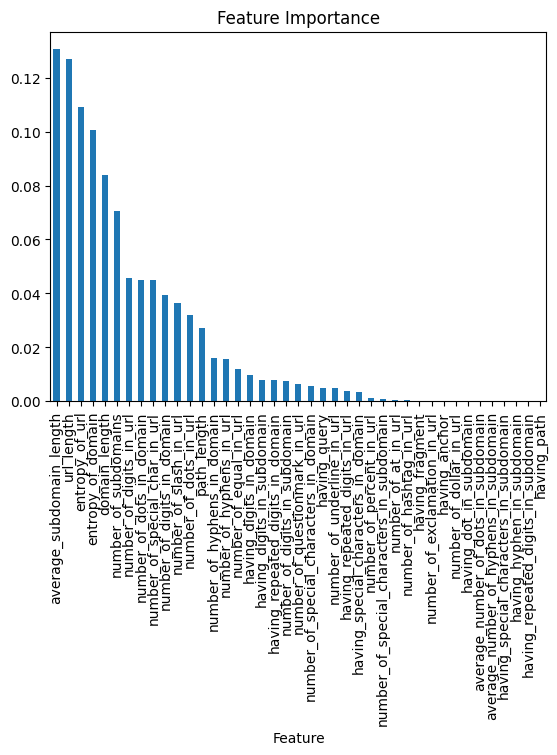

In [123]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Fit the RandomForest model
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

# Get feature importance
importances = model.feature_importances_

# Create a dataframe to display features and their importance
feature_names = X_train.columns
features_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})

# Sort by importance
features_df = features_df.sort_values(by="Importance", ascending=False)

# Plot the feature importance
features_df.plot(kind="bar", x="Feature", y="Importance", legend=False)
plt.title("Feature Importance")
plt.show()


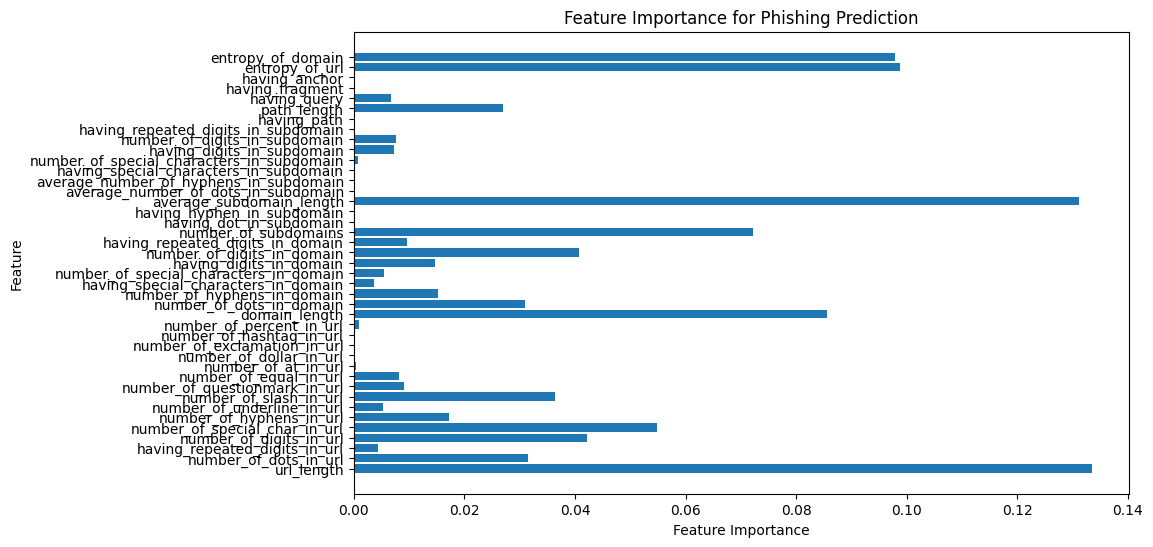

In [125]:
# Assuming 'loaded_model' is a trained model that supports feature importance
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance
importances = loaded_model.feature_importances_ if hasattr(loaded_model, 'feature_importances_') else np.zeros(df.shape[1])

# Plot feature importances
features = df.columns
plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Phishing Prediction')
plt.show()


In [127]:
# Test with a variety of URLs
urls = [
    "https://github.com/zpettry/AI-Deep-Learning-for-Phishing-URL-Detection/blob/master/train.py",
    "https://www.google.com",
    "http://example.com",
    "http://facebook.com",
    "https://www.amazon.com",
    "https://docs.google.com/forms/d/e/1FAIpQLSflGysC0n3EHfvLmwh7JsBq6Pr0fM7KIRFMQtlw3-_72HwGmw/viewform?usp=dialog&usp=embed_facebook"
]

for url in urls:
    input_data = extract_url_features(url)
    df = pd.DataFrame([input_data])
    prediction = loaded_model.predict(df)
    print(f"URL: {url}")
    print(f"Prediction: {prediction}")
    if prediction[0] == 0:
        print('Legit')
    else:
        print('Phishing')


URL: https://github.com/zpettry/AI-Deep-Learning-for-Phishing-URL-Detection/blob/master/train.py
Prediction: [1]
Phishing
URL: https://www.google.com
Prediction: [0]
Legit
URL: http://example.com
Prediction: [0]
Legit
URL: http://facebook.com
Prediction: [0]
Legit
URL: https://www.amazon.com
Prediction: [0]
Legit
URL: https://docs.google.com/forms/d/e/1FAIpQLSflGysC0n3EHfvLmwh7JsBq6Pr0fM7KIRFMQtlw3-_72HwGmw/viewform?usp=dialog&usp=embed_facebook
Prediction: [1]
Phishing
